In [1]:
import cv2
import sys
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

PATH = 'C:\\Users\\marco\\Google Drive\\ComputerScience\\Visão Computacional\\images\\Skol'

In [2]:
# caso haja mudanças em BeerClassification, reload permite atualizar sem restart do kernel
import projeto_helper
from projeto_helper import BeerClassification

import importlib
importlib.reload(projeto_helper)

<module 'projeto_helper' from 'c:\\CS\\projetoVC\\projeto_helper.py'>

In [26]:
bc = BeerClassification(PATH, ['0'])
for i, label in enumerate(bc.labels):
    print(i, label)

0 0_v000_0.jpg
1 0_v000_45L.jpg
2 0_v000_45R.jpg
3 0_v001_0.jpg
4 0_v001_45L.jpg
5 0_v001_45R.jpg
6 0_v002_0.jpg
7 0_v002_45L.jpg
8 0_v002_45R.jpg
9 0_v003_0.jpg
10 0_v003_45L.jpg
11 0_v003_45R.jpg
12 0_v004_0.jpg
13 0_v004_45L.jpg
14 0_v004_45R.jpg
15 0_v005_0.jpg
16 0_v005_45L.jpg
17 0_v005_45R.jpg
18 0_v006_0.jpg
19 0_v006_45L.jpg
20 0_v006_45R.jpg
21 0_v007_0.jpg
22 0_v007_45L.jpg
23 0_v007_45R.jpg
24 0_v008_0.jpg
25 0_v008_45L.jpg
26 0_v008_45R.jpg
27 0_v009_0.jpg
28 0_v009_45L.jpg
29 0_v009_45R.jpg
30 0_v010_0.jpg
31 0_v010_45L.jpg
32 0_v010_45R.jpg
33 0_v011_0.jpg
34 0_v011_45L.jpg
35 0_v011_45R.jpg
36 0_v012_0.jpg
37 0_v012_45L.jpg
38 0_v012_45R.jpg
39 0_v013_0.jpg
40 0_v013_45L.jpg
41 0_v013_45R.jpg
42 0_v014_0.jpg
43 0_v014_45L.jpg
44 0_v014_45R.jpg
45 0_v015_0.jpg
46 0_v015_45L.jpg
47 0_v015_45R.jpg


24


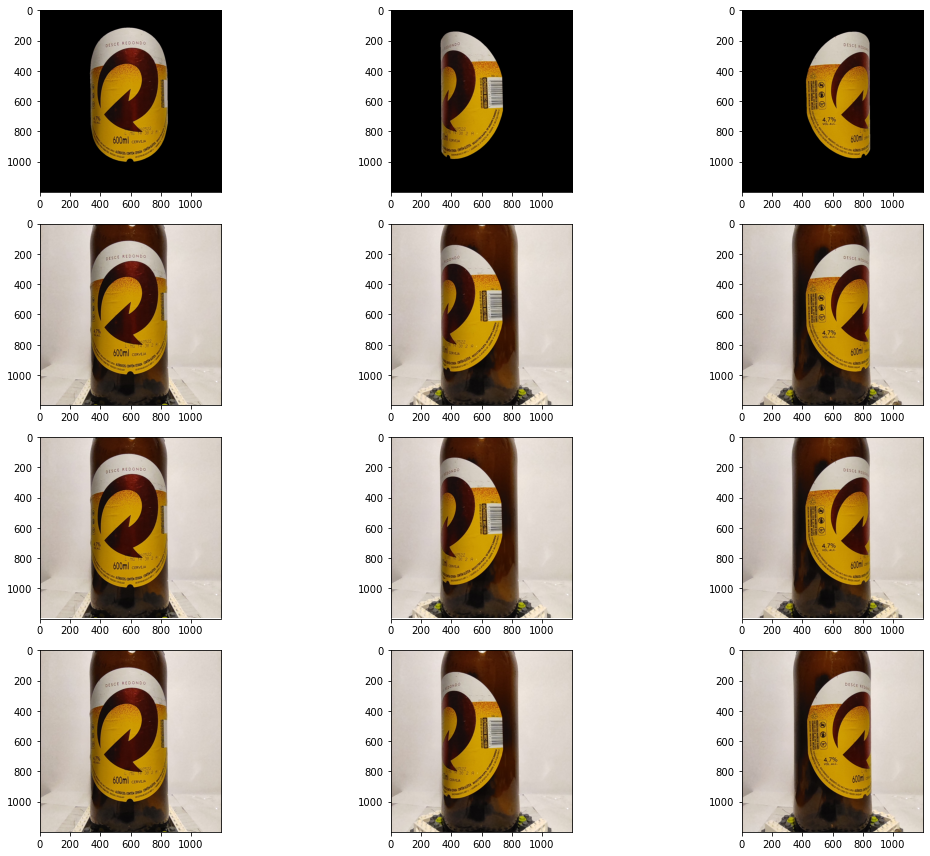

In [27]:
query_img_0 = plt.imread(bc.imgs[0])
query_img_45L = plt.imread(bc.imgs[1])
query_img_45R = plt.imread(bc.imgs[2])

mask_0 = plt.imread(join(PATH, 'mask0.jpg'))
mask_45L = plt.imread(join(PATH, 'mask45L.jpg'))
mask_45R = plt.imread(join(PATH, 'mask45R.jpg'))

query_img_0 = cv2.bitwise_and(query_img_0, mask_0)
query_img_45L = cv2.bitwise_and(query_img_45L, mask_45L)
query_img_45R = cv2.bitwise_and(query_img_45R, mask_45R)

train_imgs = []
max_idx = len(bc.imgs) - len(bc.imgs) // 2
print(max_idx)
for i in range(3, max_idx):
    train_imgs.append(plt.imread(bc.imgs[i]))
train_imgs = np.array(train_imgs, dtype=np.uint8)

fig, axs = plt.subplots(4, 3, figsize=(16, 12))
axs[0, 0].imshow(query_img_0)
axs[0, 1].imshow(query_img_45L)
axs[0, 2].imshow(query_img_45R)
for row in range(1, 4):
    for col in range(3):
        axs[row, col].imshow(train_imgs[row * 3 + col])
plt.tight_layout()
plt.show()

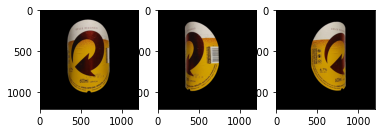

0_DIFFv001_0.jpg 0_DIFFv001_45L.jpg 0_DIFFv001_45R.jpg 0_DIFFv002_0.jpg 0_DIFFv002_45L.jpg 0_DIFFv002_45R.jpg 0_DIFFv003_0.jpg 0_DIFFv003_45L.jpg 0_DIFFv003_45R.jpg 0_DIFFv004_0.jpg 0_DIFFv004_45L.jpg 0_DIFFv004_45R.jpg 0_DIFFv005_0.jpg 0_DIFFv005_45L.jpg 0_DIFFv005_45R.jpg 0_DIFFv006_0.jpg 0_DIFFv006_45L.jpg 0_DIFFv006_45R.jpg 0_DIFFv007_0.jpg 0_DIFFv007_45L.jpg 0_DIFFv007_45R.jpg 1_DIFFv000_0.jpg 1_DIFFv000_45L.jpg 1_DIFFv000_45R.jpg 1_DIFFv001_0.jpg 1_DIFFv001_45L.jpg 1_DIFFv001_45R.jpg 1_DIFFv002_0.jpg 1_DIFFv002_45L.jpg 1_DIFFv002_45R.jpg 1_DIFFv003_0.jpg 1_DIFFv003_45L.jpg 1_DIFFv003_45R.jpg 1_DIFFv004_0.jpg 1_DIFFv004_45L.jpg 1_DIFFv004_45R.jpg 1_DIFFv005_0.jpg 1_DIFFv005_45L.jpg 1_DIFFv005_45R.jpg 1_DIFFv006_0.jpg 1_DIFFv006_45L.jpg 1_DIFFv006_45R.jpg 1_DIFFv007_0.jpg 1_DIFFv007_45L.jpg 1_DIFFv007_45R.jpg 2_DIFFv000_0.jpg 2_DIFFv000_45L.jpg 2_DIFFv000_45R.jpg 2_DIFFv001_0.jpg 2_DIFFv001_45L.jpg 2_DIFFv001_45R.jpg 2_DIFFv002_0.jpg 2_DIFFv002_45L.jpg 2_DIFFv002_45R.jpg 2_DIFFv003

In [ ]:
# bc.processGetDiffAllImages(query_imgs, [0, 1, 2], masks, folder_path='temp')